In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فروشگاه محصولات اداری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین داده‌های مربوط به یک فروشگاه لوازم اداری به شما داده شده است.
نخست داده‌ها را از فایل 
<code>Global-Superstore.xlsx</code>
بخوانید و در متغیر <code>df</code> بریزید.
</font>
</p>

In [21]:
df = pd.read_csv("SuperStore.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با استفاده از کتابخانه plt نمودار سود (profit) رادر یک نمودار هیستوگرام رسم کنید.
تعداد ستون ها را حداقل 250 تا در نظر بگیرید.
هم چنین برای مشاهده بهتر نمودار، بازه سود را محدودتر کنید.
</font>
</p>

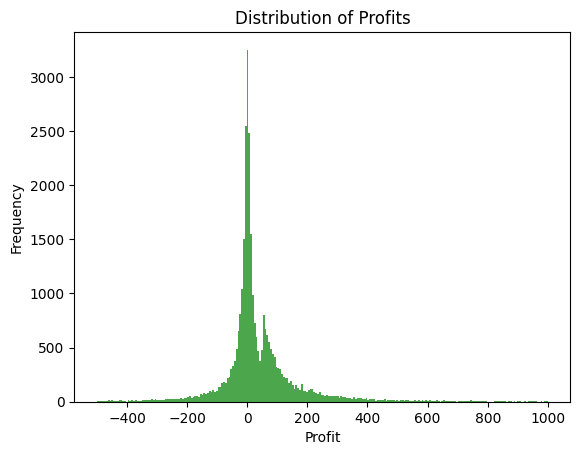

In [22]:
# Extract the "Profit" column data
profit_data = df['Profit']

# Set the number of bins (columns) and the range for the histogram
num_bins = 250
profit_range = (-500, 1000) 

plt.hist(profit_data, bins=num_bins, range=profit_range, color='green', alpha=0.7)

plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profits')

# Show the plot
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>در این سوال میخواهیم شما ۲ فرضیه را مورد ارزیابی قرار دهید و نتایج خود را برای ما شرح دهید .</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در انتخاب مدل برای تست فرض و همچنین داده‌های لازم برای انجام تست بسیار دقت کنید .</font>
</p>



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض اول لازم است که سطرهای دیتافریم را طبق ستون نوع ارسال از هم جدا کنید.. </font>
</p><p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض دوم هم لازم است که فروش‌های با تخفیف را از بدون تخفیف‌ها جدا کنید. </font>
</p>

In [23]:
# TO-DO

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه اول</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
از شما میخواهیم که بررسی کنید که آیا روش ارسال‌های متفاوت (Ship Mode) روی میزان سودی که فروشگاه به دست می‌آورد تاثیرگذار است یا خیر؛
برای این کار دو حالت ‍‍First Class و Standard Class را با هم مقایسه کنید.
</font>
</p>

In [24]:
# Separate data based on shipping modes
profit_first_class = df[df['Ship Mode'] == 'First Class']['Profit']
profit_standard_class = df[df['Ship Mode'] == 'Standard Class']['Profit']

# Perform t-test
t_statistic, p_value = ttest_ind(profit_first_class, profit_standard_class, equal_var=False) 

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Shipping mode (First Class vs. Standard Class) significantly affects profit.")
else:
    print("Shipping mode does not significantly affect profit.")


Shipping mode does not significantly affect profit.


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه دوم</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>از شما میخواهیم تا بررسی کنید آیا تخفیف‌دار کردن محصولات باعث افزایش تعداد کالا های خریداری شده از یک نوع (Quantity) در فروشگاه خواهد شد یا خیر</font>
</p>

In [25]:
# Separate data based on discounts
sales_with_discount = df[df['Discount'] > 0]['Sales']
sales_without_discount = df[df['Discount'] == 0]['Sales']

# Perform t-test
t_statistic, p_value = ttest_ind(sales_with_discount, sales_without_discount, equal_var=False)  # Welch's t-test

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Discounts significantly affect sales.")
else:
    print("Discounts do not significantly affect sales.")


Discounts significantly affect sales.


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [26]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["Statistics.ipynb", "SuperStore.csv"]

compress(file_names)

File Paths:
['Statistics.ipynb', 'SuperStore.csv']
